<a href="https://colab.research.google.com/github/davegbade/Prediction-of-Product-Sales/blob/main/Prediction%20of%20Product%20Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction of Product Sales**  
    David Gbadebo

**Project Overview**

**Load and Inspect Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import drive
drive.mount("sale_predictions_2023")

Mounted at sale_predictions_2023


In [3]:
fpath = "/content/sale_predictions_2023/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"

In [4]:
import pandas as pd

In [5]:
df_sale_predictions = pd.read_csv(fpath)

In [6]:
#Use df.info() and df.head() methods to preview the first rows of your data and a
df_sale_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df_sale_predictions.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Clean Data**

In [8]:
#Explore the data - what do you need to do to clean this data? Clean it!
#Get the number of rows and columns
print(df_sale_predictions.shape)

(8523, 12)


In [9]:
# Get the datatypes of each variable
print(df_sale_predictions.dtypes)

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


In [10]:
# Check for duplicate rows
print(df_sale_predictions.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool


In [23]:
df_sale_predictions.duplicated().sum()

0

Data has no duplicate value

In [11]:
#Be sure to address each of the following tasks:
# Drop duplicate rows

df = df_sale_predictions.drop_duplicates()
print(df_sale_predictions.duplicated())


0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool


In [12]:
# Print the new shape

print(df_sale_predictions.shape)


(8523, 12)


In [13]:
# Check for missing values

print(df_sale_predictions.isnull())

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0               False        False             False            False   
1               False        False             False            False   
2               False        False             False            False   
3               False        False             False            False   
4               False        False             False            False   
...               ...          ...               ...              ...   
8518            False        False             False            False   
8519            False        False             False            False   
8520            False        False             False            False   
8521            False        False             False            False   
8522            False        False             False            False   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0         False     False              False    

In [24]:
# Drop the row that contains all missing values
df_sale_predictions.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [25]:
df_sale_predictions.isna().sum() / len(df) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

These are all the Missing Items:

. Item_Weight                  1463

. Outlet_Size                  2410 

. In order to handle the missing value we will do some additional EDA.










In [26]:
# Drop the row that contains all missing values
df_sale_predictions = df_sale_predictions.dropna(how='all')

In [27]:
# View all duplicated rows using your duplicated_rows_all filter

duplicated_rows = df_sale_predictions.duplicated(keep=False)
# Obtain the sum of duplicated to confirm all have been dropped

duplicated_rows.sum()

0

In [28]:
# print the value counts for the column
print(df_sale_predictions.value_counts())

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type     Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type        Item_Outlet_Sales
DRA12            11.600       Low Fat           0.000000         Soft Drinks   141.9154  OUT035             2004                       Small        Tier 2                Supermarket Type1  992.7078             1
FDV35            19.500       Low Fat           0.128182         Breads        156.1314  OUT035             2004                       Small        Tier 2                Supermarket Type1  2792.3652            1
FDV25            5.905        low fat           0.045614         Canned        221.5456  OUT013             1987                       High         Tier 3                Supermarket Type1  6852.4136            1
                              Low Fat           0.045838         Canned        222.5456  OUT018             2009                       Medium       Tier 3   

In [49]:
# Check for inconsistencies by inspecting the value_counts 

print(df_sale_predictions['Item_Fat_Content'].unique())

['Low Fat' 'Regular']


In [50]:
print(df_sale_predictions['Outlet_Size'].unique())

['Medium' 'Unknown' 'High' 'Small']


In [51]:
print(df_sale_predictions['Outlet_Type'].unique())

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [52]:
df_sale_predictions['Item_Fat_Content'] = df_sale_predictions['Item_Fat_Content'].replace('LF','Low Fat')

In [53]:
df_sale_predictions['Item_Fat_Content'] = df_sale_predictions['Item_Fat_Content'].replace('reg','Regular')


In [54]:
# Replace the different options in Item_Fat_Content to "Low Fat" and "Regular"
df_sale_predictions['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}, inplace=True)

In [55]:
print(df_sale_predictions.describe())

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count   8523.00000      8523.000000  8523.000000                8523.000000   
mean      12.81342         0.066132   140.992782                1997.831867   
std        4.22724         0.051598    62.275067                   8.371760   
min        4.55500         0.000000    31.290000                1985.000000   
25%        9.31000         0.026989    93.826500                1987.000000   
50%       12.60000         0.053931   143.012800                1999.000000   
75%       16.00000         0.094585   185.643700                2004.000000   
max       21.35000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


**Exploratory Data Analysis**

In [56]:
# Let's investigate the rows with missing information
df_sale_predictions.loc[df.isna().any(axis=1)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
7,FDP10,12.60,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Unknown,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Unknown,Tier 2,Supermarket Type1,4710.5350
18,DRI11,12.60,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
...,...,...,...,...,...,...,...,...,...,...,...,...
8504,NCN18,12.60,Low Fat,0.124111,Household,111.7544,OUT027,1985,Medium,Tier 3,Supermarket Type3,4138.6128
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,Unknown,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.10,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,Unknown,Tier 3,Grocery Store,424.7804
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,Unknown,Tier 2,Supermarket Type1,468.7232


In [36]:
# Replace the missing values in 'Item_Weight' with the median
df_sale_predictions['Item_Weight'].fillna(df_sale_predictions['Item_Weight'].median(), inplace=True)

In [37]:
# Replace the missing values in 'Outlet_Size' with the constant value 'Unknown'
df_sale_predictions['Outlet_Size'].fillna('Unknown', inplace=True)


In [57]:
df_sale_predictions.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

No More Missing Items

**Inspecting Experience Level:**

Here we are setting the style to use for seaborn so that all the visuals have the same format.





In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
## Using three seaborn styles: dark_background, seaborn-muted and seaborn-poster.
plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])


<ipython-input-59-1d20c34fce50>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])
<ipython-input-59-1d20c34fce50>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])


In [60]:
df_sale_predictions['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

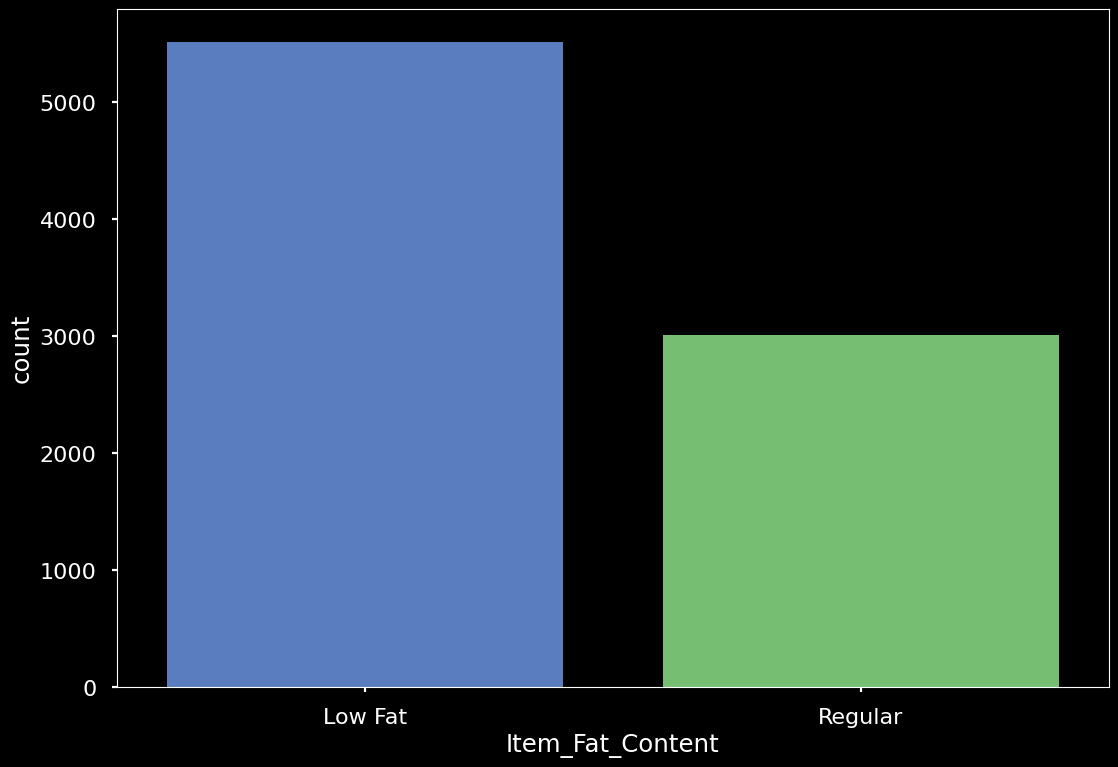

In [62]:
ax = sns.countplot(data = df_sale_predictions, x = 'Item_Fat_Content');

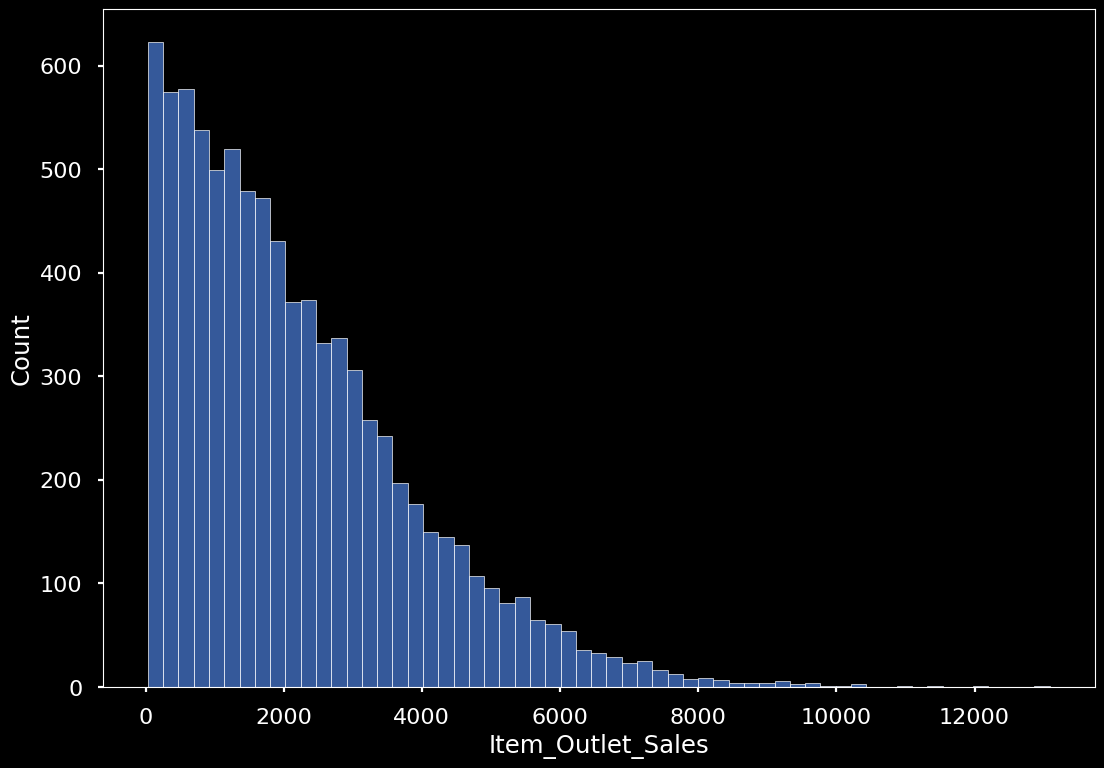

In [63]:
ax = sns.histplot(data = df_sale_predictions, x = 'Item_Outlet_Sales')

**Explanatory Data Analysis**